[[220.90964004]
 [183.90262486]
 [208.57396831]
 [159.2312814 ]
 [159.2312814 ]
 [146.89560968]
 [208.57396831]
 [159.2312814 ]
 [220.90964004]
 [159.2312814 ]]
56627.58814014698


/tmp/ipykernel_30099/614753867.py:43: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize = 12, loc="upper right")


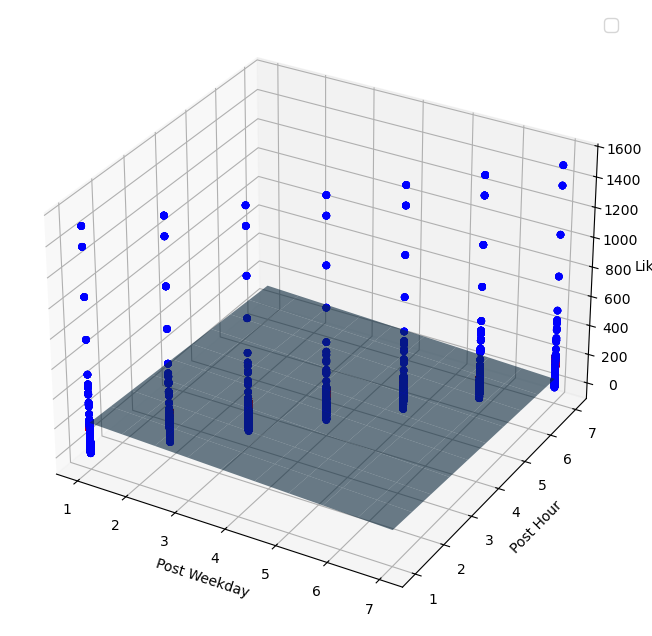

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

df = pd.read_csv('datasets/Dataset_Facebook.csv')
df = df.dropna(subset=['like'])

x1 = df['Post Weekday'].values.reshape((-1,1)) # Variable independiente
x2 = df['Post Hour'].values.reshape((-1,1)) # Variable independiente
y = df['like'].values.reshape((-1,1)) # Variable dependiente

# train and test
model = LinearRegression()

variablex = np.concatenate # auxiliar variable
x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size = 0.2, random_state = 42) # split the train and test datasets
model.fit(x_train, y_train) # train model

y_pred = model.predict(x_test) # predict
print(y_pred[0:10])
mse = mean_squared_error(y_test, y_pred) # mean squared error
print(mse)

fig = plt.figure()
plt.rcParams['figure.figsize'] = (8,8)
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(x_test[:,0], x_test[:,0], y_test, c = 'b', marker = 'o')
ax.scatter(x_test[:,0], x_test[:,0], y_pred, c = 'r', marker = 'o')

xaux = np.linspace(x_test[:,0].min(), x_test[:,0].max(), num=10)
yaux = np.linspace(x_test[:,0].min(), x_test[:,0].max(), num=10)
xaux, yaux = np.meshgrid(xaux, yaux)

z = model.intercept_ + model.coef_[0][0]*xaux + model.coef_[0][0]*yaux
ax.plot_surface(xaux, yaux, z, alpha = 0.6)
ax.set_xlabel('Post Weekday')
ax.set_ylabel('Post Hour')
ax.set_zlabel('Like')
plt.legend(fontsize = 12, loc="upper right")
plt.show()